### Simulation of the signal

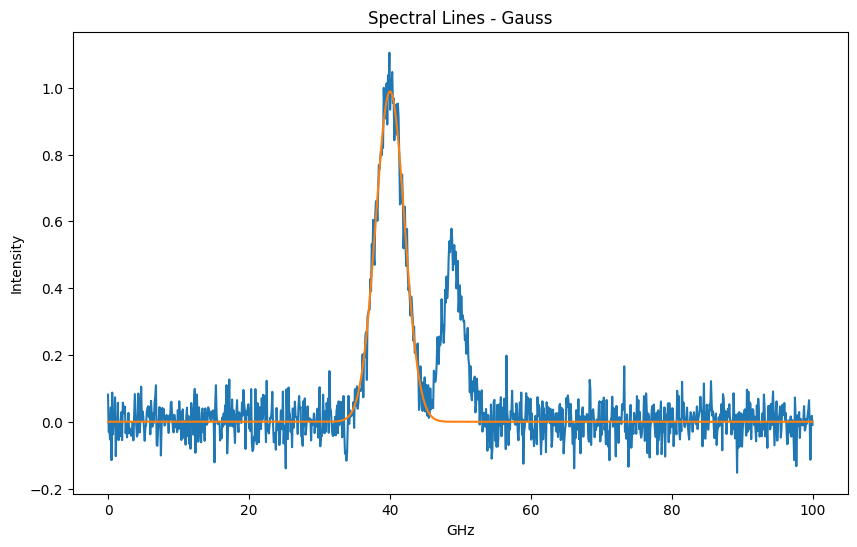

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 1000
    # variables        = 3
    chi-square         = 8.92428441
    reduced chi-square = 0.00895114
    Akaike info crit   = -4712.97913
    Bayesian info crit = -4698.25587
    R-squared          = 0.77340486
[[Variables]]
    A:      0.98919881 +/- 0.01924438 (1.95%) (init = 1)
    mu:     40.0308261 +/- 0.04599634 (0.11%) (init = 40)
    sigma:  2.04735254 +/- 0.04599634 (2.25%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, sigma) = -0.5773


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

x = np.linspace(0, 100, 1000)

spectrum = gaussian(x, 1, 40, 2) + gaussian(x, 0.5, 49, 1.5)

np.random.seed(1)
noise_level = 0.05
spectrum += np.random.normal(0, noise_level, len(x))

X_values = np.array(x)
Y_values = np.array(spectrum)

gmodel = Model(gaussian)

result = gmodel.fit(Y_values, A=1, mu=40, sigma=0.1, x=X_values)

plt.figure(figsize=(10, 6))
plt.plot(x, spectrum)
plt.plot(x, result.best_fit, '-')
plt.xlabel('GHz')
plt.ylabel('Intensity')
plt.title('Spectral Lines - Gauss')
plt.show()

print(result.fit_report())


### TRY 1 - No smoothing

203


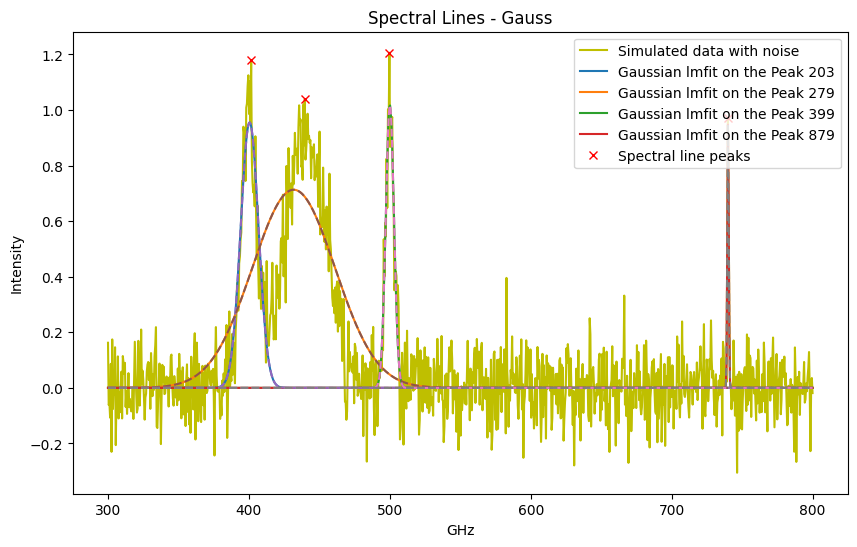

Peak: (401.6016016016016, 1.1794622726990494)
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 60
    # data points      = 1000
    # variables        = 3
    chi-square         = 65.3902936
    reduced chi-square = 0.06558705
    Akaike info crit   = -2721.38145
    Bayesian info crit = -2706.65818
    R-squared          = 0.10315029
[[Variables]]
    A:      0.95553606 +/- 0.06623694 (6.93%) (init = 1)
    mu:     400.491333 +/- 0.50682845 (0.13%) (init = 401.6016)
    sigma:  6.33196371 +/- 0.50682845 (8.00%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, sigma) = -0.5774
Peak: (439.63963963963965, 1.0397247125403517)
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 52
    # data points      = 1000
    # variables        = 3
    chi-square         = 33.0048050
    reduced chi-square = 0.03310412
    Akaike info crit   = -3405.102

In [5]:
from scipy.signal import find_peaks

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

x = np.linspace(300, 800, 1000)

spectrum = gaussian(x, 1, 400, 5) + gaussian(x, 0.9, 440, 15) + gaussian(x, 1, 500, 3) + gaussian(x, 0.9, 740, 0.5)

np.random.seed(1)
noise_level = 0.1
spectrum += np.random.normal(0, noise_level, len(x))

X_values = np.array(x)
Y_values = np.array(spectrum)

peaks = find_peaks(Y_values, prominence=0.8, width=1)[0]
print(peaks[0])

gmodel = Model(gaussian)
results = {}

for i in peaks:
    results[i] = gmodel.fit(Y_values, A=1, mu=X_values[i], sigma=1, x=X_values, method='least_squares')

plt.figure(figsize=(10, 6))
plt.plot(x, spectrum, color= 'y', label= 'Simulated data with noise')

for i in peaks:
    plt.plot(x, results[i].best_fit, '-', label=f'Gaussian lmfit on the Peak {i}')

plt.plot(X_values[peaks], Y_values[peaks], 'rx', label='Spectral line peaks')

for i, result in results.items():
    plt.plot(X_values, result.best_fit, '--')

plt.xlabel('GHz')
plt.ylabel('Intensity')
plt.title('Spectral Lines - Gauss')
plt.legend()
plt.show()

for i, result in results.items():
    print(f"Peak: ({X_values[i]}, {Y_values[i]})")
    print(result.fit_report())


### TRY 2 - Gaussian filter smoothing

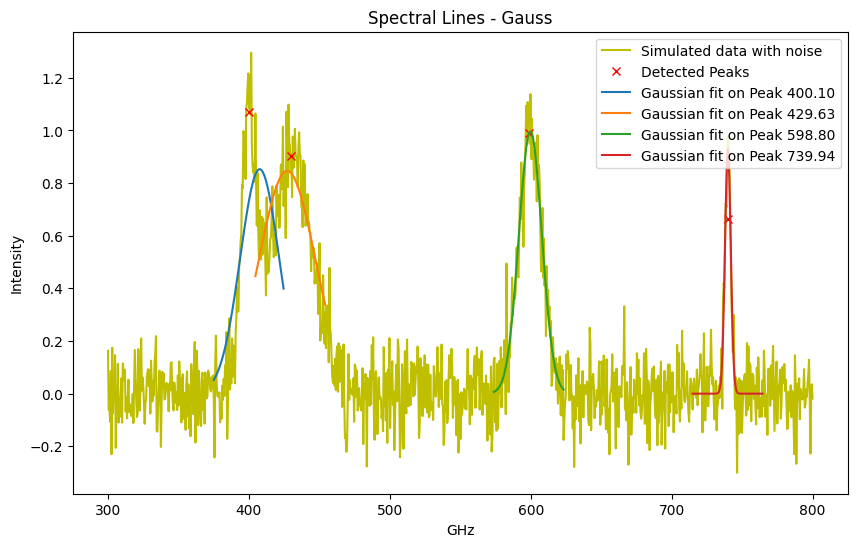

Peak: (400.1001001001001, 1.083147352657023)
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 61
    # data points      = 100
    # variables        = 3
    chi-square         = 5.77110938
    reduced chi-square = 0.05949597
    Akaike info crit   = -279.230586
    Bayesian info crit = -271.415075
    R-squared          = 0.59459351
[[Variables]]
    A:      0.85294196 +/- 0.04478694 (5.25%) (init = 1)
    mu:     407.631198 +/- 0.94870434 (0.23%) (init = 400.1001)
    sigma:  13.7895619 +/- 1.08279677 (7.85%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, sigma)  = -0.6021
    C(mu, sigma) = +0.3427
    C(A, mu)     = -0.1364
Peak: (429.6296296296297, 0.8390258772562394)
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 100
    # variables        = 3
    chi-square         = 2.10700429
    reduced chi-square = 0.0217

In [15]:
from scipy.ndimage import gaussian_filter

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

x = np.linspace(300, 800, 1000)

spectrum = gaussian(x, 1, 400, 5) + gaussian(x, 0.9, 430, 15) + gaussian(x, 1, 600, 8) + gaussian(x, 0.9, 740, 2)

np.random.seed(1)
noise_level = 0.1
spectrum += np.random.normal(0, noise_level, len(x))

X_values = np.array(x)
Y_values = np.array(spectrum)

sigma = 4
smoothed_y = gaussian_filter(Y_values, sigma)

peaks, _ = find_peaks(smoothed_y, prominence=0.3, distance=40)

gmodel = Model(gaussian)
results = {}

for i in peaks:
    start_index = max(0, i - 50)
    end_index = min(len(X_values), i + 50)
    result = gmodel.fit(Y_values[start_index:end_index], x=X_values[start_index:end_index], A=1, mu=X_values[i], sigma=1, method='leastsq')
    results[i] = result

plt.figure(figsize=(10, 6))
plt.plot(x, spectrum, color='y', label='Simulated data with noise')

plt.plot(X_values[peaks], smoothed_y[peaks], 'rx', label='Detected Peaks')

for i in peaks:
    plt.plot(X_values[max(0, i - 50):min(len(X_values), i + 50)], results[i].best_fit, '-', label=f'Gaussian fit on Peak {X_values[i]:.2f}')

plt.xlabel('GHz')
plt.ylabel('Intensity')
plt.title('Spectral Lines - Gauss')
plt.legend()
plt.show()

for i, result in results.items():
    print(f"Peak: ({X_values[i]}, {Y_values[i]})")
    print(result.fit_report())
    

### Try 3 - (Overkill) Gaussian Process Regressor

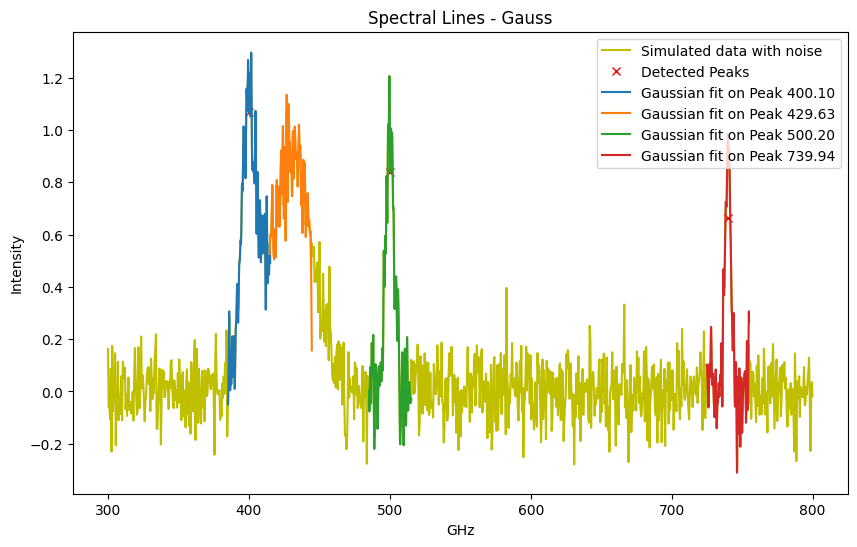

Peak: (400.1001001001001, 1.083147352657023)
Optimized parameters: 0.552**2 * RBF(length_scale=0.553)
Peak: (429.6296296296297, 0.8390258772562394)
Optimized parameters: 0.603**2 * RBF(length_scale=0.573)
Peak: (500.20020020020024, 0.8671381788481276)
Optimized parameters: 0.361**2 * RBF(length_scale=0.469)
Peak: (739.9399399399399, 0.9774116981699978)
Optimized parameters: 0.29**2 * RBF(length_scale=0.476)


In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

x = np.linspace(300, 800, 1000)

spectrum = gaussian(x, 1, 400, 5) + gaussian(x, 0.9, 430, 15) + gaussian(x, 1, 500, 3) + gaussian(x, 0.9, 740, 2)

np.random.seed(1)
noise_level = 0.1
spectrum += np.random.normal(0, noise_level, len(x))

X_values = np.array(x)
Y_values = np.array(spectrum)

sigma = 4
smoothed_y = gaussian_filter(Y_values, sigma)

peaks, _ = find_peaks(smoothed_y, prominence=0.3, distance=40)

results = {}
for i in peaks:
    start_index = max(0, i - 30)
    end_index = min(len(X_values), i + 30)
    X_fit = X_values[start_index:end_index].reshape(-1, 1)
    y_fit = Y_values[start_index:end_index]
    
    kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gp.fit(X_fit, y_fit)
    results[i] = gp

plt.figure(figsize=(10, 6))
plt.plot(x, spectrum, color='y', label='Simulated data with noise')

plt.plot(X_values[peaks], smoothed_y[peaks], 'rx', label='Detected Peaks')

for i in peaks:
    X_pred = np.linspace(X_values[max(0, i - 30)], X_values[min(len(X_values), i + 30)], 1000).reshape(-1, 1)
    y_pred, sigma = results[i].predict(X_pred, return_std=True)
    plt.plot(X_pred, y_pred, '-', label=f'Gaussian fit on Peak {X_values[i]:.2f}')

plt.xlabel('GHz')
plt.ylabel('Intensity')
plt.title('Spectral Lines - Gauss')
plt.legend()
plt.show()

for i, gp in results.items():
    print(f"Peak: ({X_values[i]}, {Y_values[i]})")
    print(f"Optimized parameters: {gp.kernel_}")
